In [32]:
from IPython.display import display
from IPython.core.display import HTML

# Machine Learning - Aufgabenblatt 2

## Datensatz

Wir arbeiten in dieser Aufgabenblatt mit dem `fish.csv` Datensatz.

Dies ist ein öffentlicher Datensatz https://www.kaggle.com/aungpyaeap/fish-market und ist gut hier beschrieben: https://documentation.sas.com/doc/en/pgmsascdc/9.4_3.4/imlsug/imlsug_ugappdatasets_sect009.htm

Es handelt sich um Fische die am Finland’s Lake Laengelmaevesi gefangen wurden und folgende Features wurden erhoben:

| Feature | Descriptiopn                                                                  |
|---------|-------------------------------------------------------------------------------|
| Species | species of fish                                                               |
| Weight  | weight of the fish, in grams                                                  |
| Length1 | length of the fish from the nose to the beginning of the tail, in centimeters |
| Length2 | length of the fish from the nose to the notch of the tail, in centimeters     |
| Length3 | length of the fish from the nose to the end of the tail, in centimeters       |
| Height  | maximum height of the fish, in centimeters                                    |
| Width   | maximum width of the fish, in centimeters                                     |


## Ziel

Wir wollen in diesem Aufgabenblatt ein `lineares Modell` trainieren, dass als `Output` das Gewicht eines Fisches (`Weight`) anhand verschiedener `Features` vorhersagen kann.

![Ziel dieses Aufgabenblattes](./img/goal.png)


## Setup

Das Einlesen der Daten wurde hier bereits gemacht.

In [33]:
import pandas as pd

df = pd.read_csv('data/fish.csv')

df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Aufgabe 1 - Train, Validation, Test Split

In Aufgabe 1 teilen wir die Daten in
* `Features` und `Zielvariable` (Aufgabe 1.1)
* ein `Test-Set` und `Data-Set` (Aufgabe 1.2)
* und anschliessend das `Data-Set` in ein `Train-Set` und `Validation-Set` (Aufgabe 1.5).

### Aufgabe 1.1 - Aufteilen in Features und Zielvariable

Zuerst müssen wir unser Datensatz in `Features` und `Zielvariable` aufteilen.
Wir möchten das Gewicht eines Fisches vorhersagen können, also ist `Weight` unsere Zielvariable.
Und wir behalten vorerst alle restlichen Features.

1. Spalten Sie den Datensatz `df` in die Features `X` (alle Features/Spalten ausser `Weight`, mittels `df.drop`) und die Zielvariable `y` (hier `Weight`, mittels Basic-Indexing) auf.
2. Achten Sie darauf, dass `X` ein `DataFrame` ist und `y` eine `Series` ist. Den Typ einer Variable X können sie in Python mittels `type(X)` herausfinden.
3. Wieviele Zeilen und wieviele Spalten hat `X`? Nutzen Sie `X.shape`, um die Frage zu beantworten. Was für eine `shape` hat y?

#### Hilfreiche Links

* Basic Indexing `df['col_name']`: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#basics
* `drop`: Unter https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html Beispiel "Drop columns".
* `shape`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html
* `type`: https://www.programiz.com/python-programming/methods/built-in/type

In [34]:
# 1. `drop`
X = df.drop(columns='Weight')
y = df['Weight']

# 2.
# X ist ein pandas DataFrame (Matrix mit Features Namen)
print(type(X))
# y ist eine pandas.Series (Vektor mit Feature Name)
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [35]:
# 3.
# X hat 159 Zeilen/Datenpunkte und 6 Spalten/Features.
print(X.shape)
# y hat 159 Zeilen/Datenpunkte und "keine" Spalte.
# Series haben keine Spalten, sondern sind angeordnete Werte (hier 159 Werte).
# Die shape ist daher (159, ), dies entspricht einer Series in pandas bzw. einem Vektor in numpy
print(y.shape)

(159, 6)
(159,)


### Aufgabe 1.2 - Test-Set, Data-Set - `train_test_split`

Im Theorie Teil haben wir das Aufteilen der Daten in `Train-Set`, `Validation-Set` und `Test-Set` angeschaut.

![Train-Val-Test Split](./img/train-val-test.png)

1. Teilen Sie unsere Daten (Features `X` und Zielvariable `y`) in ein `Test-Set` und `Data-Set` auf mittels `sklearn.model_selection.train_test_split`

Das `Data-Set` teilen wir in Aufgabe 1.5 weiter auf.

#### Hilfreiche Links

* `train_test_split`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [36]:
# 1.

from sklearn.model_selection import train_test_split

print("Vor dem Split...")
print(X.shape, type(X))
print(y.shape, type(y))

# Es ist oft sinnvoll die Daten vor dem Split noch zu mischeln (shuffle=True)
# Falls die Daten (X, y) allenfalls eine vordefinierte Ordnung (z.B. chronologisch) haben.
# random_state wird fixiert, dass der Musterlösung Output immer gleich ist.
X_data, X_test, y_data, y_test = train_test_split(X, y, random_state=42, shuffle=True)

print("... ist nach dem Split:")
# Von unseren 159 Datenpunkten sind 119 Datenpunkte im Train-Set und 40 Datenpunkte im Validation-Set
# Beachten Sie, dass sich der Typ nicht verändert hat. y war eine pandas.Series (Vektor mit Feature Name) und X war ein pandas DataFrame (1-spaltige Matrix mit Feature Name)
print(X_data.shape, type(X_data), sep='\t')
print(y_data.shape, type(y_data), sep='\t')

print(X_test.shape, type(X_test), sep='\t')
print(y_test.shape, type(y_test), sep='\t')

Vor dem Split...
(159, 6) <class 'pandas.core.frame.DataFrame'>
(159,) <class 'pandas.core.series.Series'>
... ist nach dem Split:
(119, 6)	<class 'pandas.core.frame.DataFrame'>
(119,)	<class 'pandas.core.series.Series'>
(40, 6)	<class 'pandas.core.frame.DataFrame'>
(40,)	<class 'pandas.core.series.Series'>


Wichtig: Das `Test-Set` werden wir **bis zur letzten Aufgabe nicht mehr anfassen**. Die Idee vom Test-Set ist **am Ende eines Machine Learning Projektes** ein unbiased estimate über die Performanz vom finalen Modell zu erhalten.
Es darf also **nicht** in die Modellfindung (Model-Selection) einfliessen.

In diesen Aufgabenblättern ist es (wahrscheinlich) Overkill extra ein Test-Set zu erstellen. 
Es ist aber wichtig, dass Sie den vollständigen Ablauf sehen.

### Aufgabe 1.3 - Datenanalyse - Schauen wir uns die Daten mal an

Wir können das Feature `Height` als X-Achse und die Zielvariabl `Weight` als Y-Achse in einem Scatter-Plot visualisieren:

1. 
Erstellen Sie einen Scatter-Plot mit `Height` als X-Achse und `Weight` als Y-Achse mittels `sns.scatterplot`. `seaborn`s `scatterplot` erwartet ein DataFrame für den `data` Parameter.
Um die geteilten Daten (`X_data`, `y_data`), wieder in ein DataFrame zu verwandeln, kann man `pd.concat` verwenden: `pd.concat([X_data, y_data], axis=1)`
2. Was können Sie bereits anhand vom Scatter-Plot über die Performanz des linearen Modells sagen?

#### Hilfreiche Links

* `sns.scatterplot`: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
* Was ist ein Scatter-Plot: https://chartio.com/learn/charts/what-is-a-scatter-plot/
* `pd.concat`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
* Pandas Cheat Sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf, bei "Reshaping Data" ist `pd.concat` mit `axis=1` visuell dargestellt.

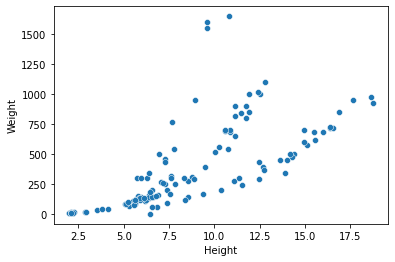

In [37]:
# Beachten Sie, dass wir bereits hier nur auf X_data gehen, nicht auf df und nicht auf X_test, y_test.
# X_test sollte *nicht* in unseren Entscheidungsprozess einfliessen - also auch nicht bei der Datenanalyse verwenden.

import seaborn as sns
import matplotlib.pyplot as plt

# 1.
sns.scatterplot(data=pd.concat([X_data, y_data], axis=1), x='Height', y='Weight')
plt.show()

2.
Im Scatter-Plot sieht man einen klaren **nicht-linearen** Zusammenhang zwischen dem Feature `Height` und der Zielvariable `Weight` - die Punkte liegen auf Kurven, nicht auf Geraden.
Wir sehen auch mehrere unterschiedliche Fälle, die wir anhand von `Height` nicht unterscheiden können.
Beispielsweise bei Height = 12.5, soll das Modell ~350 oder ~1000 vorhersagen (Siehe plot unten)? Weitere Features könnten helfen diese Fälle zu unterscheiden, beispielsweise um welche Spezie es sich handelt.
Wir brauchen also sicherlich weitere Features als nur `Height`, um das Gewicht eines Fisches gut vorhersagen zu können.

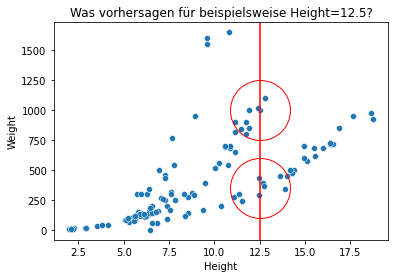

In [38]:
a = sns.scatterplot(data=pd.concat([X_data, y_data], axis=1), x='Height', y='Weight')
a.plot([12.5],[350],'o',ms=60,mec='r',mfc='none')
a.plot([12.5],[1000],'o',ms=60,mec='r',mfc='none')
plt.axvline(12.5, 0, c='red')
plt.title("Was vorhersagen für beispielsweise Height=12.5?")
plt.show()

Ein Lineares Modell auf nur diesem Feature (Aufgabe 2) wird also sicherlich Underfitten.
In Aufgabe 3 erweitern wir das Lineare Modell aus Aufgabe 2 um weitere Features.

### Aufgabe 1.4 - Pairplot - `sns.pairplot`

Den oben erstellten Scatter-Plot kann man auch systematisch auf alle Features und Zielvariable kombinationen anwenden. Seaborn bietet bereits eine Funktion dafür an.

1. Erstellen Sie den pairplot mittels `sns.pairplot`.
2. Interpretieren Sie den pairplot.

#### Hilfreiche Links

* `sns.pairplot`: https://seaborn.pydata.org/generated/seaborn.pairplot.html
* Video explaining pairplot: https://www.youtube.com/watch?v=uCgvlfIo9fg zeigt auch weitere Optionen, die wir hier nicht anschauen.

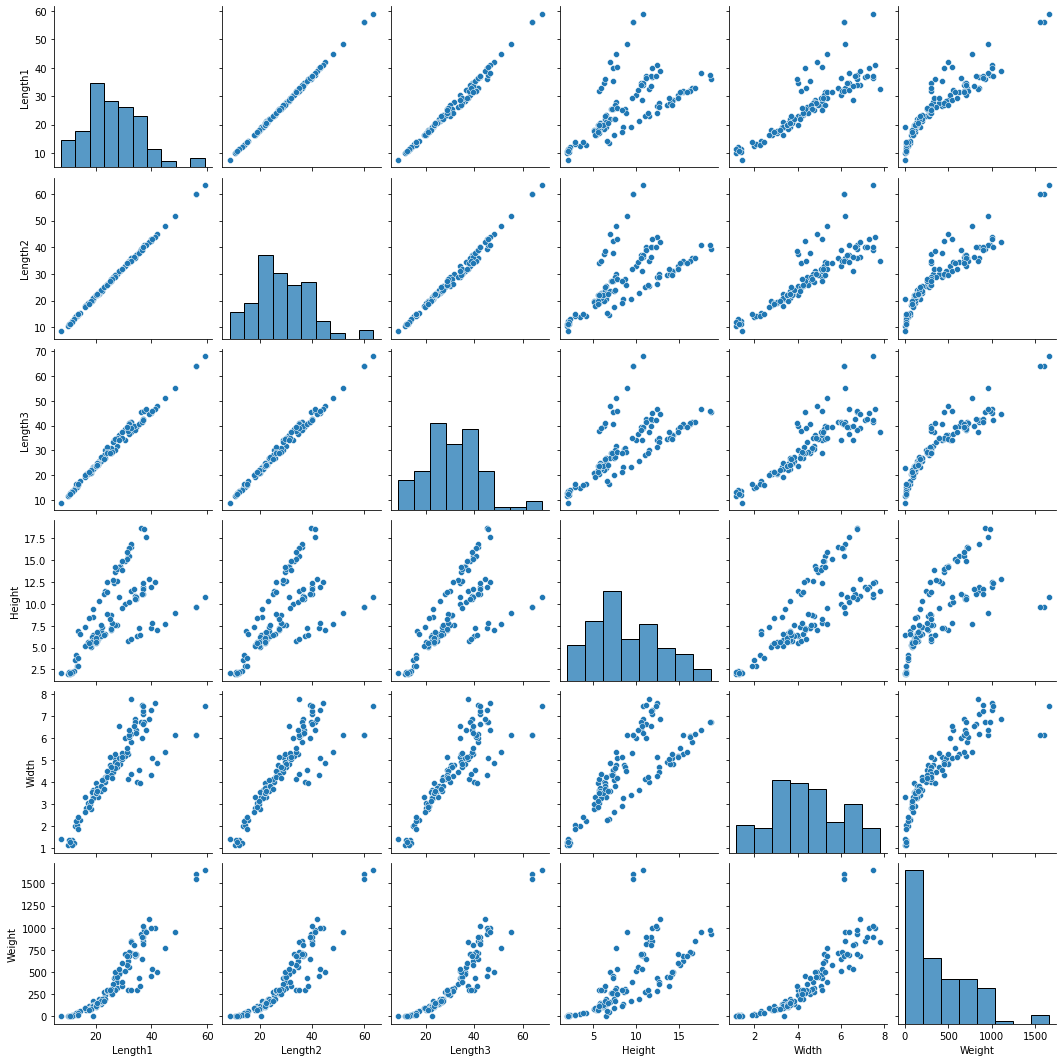

In [39]:
# 1.
sns.pairplot(pd.concat([X_data, y_data], axis=1))
plt.show()

2. Wir sehen, dass die `Length1`, `Lenght2` und `Length3` Features **stark korrelieren** (linear zusammenhängen) - liest man die Feature Beschreibung zu Beginn des Aufgabenblattes überrascht dies nicht gross. Wir sehen, dass das Gewicht (`Weight`) einen scheinbar polynomieller Zusammenhang mit den Längen (z.B. `Length1`), der Höhe (`Height`) und der Breite (`Width`) des Fisches hat. Dies nutzen wir in Aufgabe 3 aus.

### Aufgabe 1.5 - Train-Set, Validation-Set - `train_test_split`

In Aufgabe 1.2 haben wir die Daten (`df`) in `Data-Set` und `Test-Set` aufgeteilt. Anschliessend haben wir Datenanalyse auf dem `Data-Set` betrieben.

In dieser Aufgabe teilen wir das `Data-Set` weiter in `Train-Set` und `Validation-Set` auf.

![Train-Val-Test Split](./img/train-val-test.png)

1. Teilen Sie das `Data-Set` (`X_data`, `y_data`) in ein `Train-Set` und `Validation-Set` auf mittels `sklearn.model_selection.train_test_split` (Analog zur Aufgabe 1.2).

In [40]:
# 1.

from sklearn.model_selection import train_test_split

print("Vor dem Split...")
# Beachten Sie, dass wir hier X_data verwenden: Also alle Daten ausserhalb des Test-Sets.
print(X_data.shape, type(X_data))
print(y_data.shape, type(y_data))

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, random_state=42, shuffle=True)

print("... ist nach dem Split:")
# Von unseren 119 Datenpunkten sind 89 Datenpunkte im Train-Set und 30 Datenpunkte im Validation-Set
# Beachten Sie, dass sich der Typ nicht verändert hat. y war eine pandas.Series (Vektor mit Feature Name) und X war ein pandas DataFrame (1-spaltige Matrix mit Feature Name)
print(X_train.shape, type(X_train), sep='\t')
print(y_train.shape, type(y_train), sep='\t')

print(X_val.shape, type(X_val), sep='\t')
print(y_val.shape, type(y_val), sep='\t')

Vor dem Split...
(119, 6) <class 'pandas.core.frame.DataFrame'>
(119,) <class 'pandas.core.series.Series'>
... ist nach dem Split:
(89, 6)	<class 'pandas.core.frame.DataFrame'>
(89,)	<class 'pandas.core.series.Series'>
(30, 6)	<class 'pandas.core.frame.DataFrame'>
(30,)	<class 'pandas.core.series.Series'>


### Schlusswort Aufgabe 1

In Aufgabe 1 haben wir das ursprüngliche DataFrame `df` in Features `X` und Zielvariable `y` unterteilt, und diese dann weiter in `Train-Set` (`X_train` und `y_train`), `Validation-Set` (`X_val` und `y_val`) sowie `Test-Set` (`X_test` und `y_test`) aufgeteilt.

Wir haben bereit ein wenig Datenanalyse (Aufgabe 1.3 und Aufgabe 1.4) gemacht. 
Beachten Sie, dass wir mit Absicht nicht die `Test-Set` Daten plotteten.
Wir wollen am Schluss ein unbiased estimate über die Performanz von unserem finalen Modell berechnen können.
Als Selbstübung kann man noch weitere seaborn plots ausprobieren: https://seaborn.pydata.org/examples/index.html.
Beispielsweise können Sie das Gewicht der Fische als Boxplot nach Fisch-Spezie darstellen: https://seaborn.pydata.org/examples/grouped_boxplot.html

Das `Train-Set` und `Validation-Set` verwenden wir in Aufgabe 2 und Aufgabe 3, um ein finales Modell zu trainieren und zu finden.

## Linear Regression

### Performanzmass

Als Performanzmass für die Evaluierung des Modells nutzen wir den `RMSE` (`R`oot `M`ean `S`quared `E`rror):

\begin{equation*}
RMSE(\vec{y}, \vec{\hat{y}}) = \sqrt{\frac{1}{N} \sum_{i=1}^N (y^{(i)} - \hat{y}^{(i)})^2}
\end{equation*}

Wobei $\vec{y}$ die echten Fisch-Gewichte sind, und $\vec{\hat{y}}$ unsere Modellvorhersagen sind, und $N$ die Anzahl Datenpunkte ist.

In diesem Aufgabenblatt ist das Performanzmass mit `RMSE` vorgegeben. **In eigenen Projekten muss man zum Beginn des Projektes ein sinnvolles Performanzmass festlegen.**

## Aufgabe 2 - Einfaches Modell

In Aufgabe 2 machen wir ein einfaches Lineares Modell mit **nur einem Feature**, dem Feature `Height`.

Warum nur ein Feature? Weil es den Code einfacher macht und somit einfacher zu verstehen ist - also rein didaktische Gründe.
Warum das Feature `Height`?
Der Pairplot hat gezeigt, dass es einen Zusammenhang zwischen `Height` und `Weight` gibt, wir hätten aber auch `Width` nehmen können.

Wir wollen also ein Modell trainieren, dass anhand der Höhe des Fisches (`Height`), das Gewicht (`Weight`) des Fisches vorhersagt.

In Aufgabe 3 werden wir dann weitere Features in betracht ziehen, um das Modell zu verbessern.

### Aufgabe 2.1 - Feature selektieren

1. Selektieren Sie von `X_train` nur das Feature `Height` mittels Basic-Indexing und verwandeln Sie, wenn nötig die Series in ein DataFrame mittels `s.to_frame()`.
 * Benennen Sie die Variable mit dem neue DataFrame `X_train_height`.
2. Untersuchen Sie den type des erstellten DataFrames mittels `type(df)`. Es sollte ein DataFrame sein.
3. Untersuchen Sie die Dimensionen des erstellten DataFrames mittels `df.shape`. Es sollte die Dimensionen (89, 1) haben.

In [41]:
# 1. Mit Basic Indexing und s.to_frame()
X_train_height = X_train['Height'].to_frame()

# 1. Alternative: Select Features mit Basic Indexing direkt als 1-spaltiges DataFrame.
del X_train_height
X_train_height = X_train[['Height']]  # Ist equivalent zu X = df['Height'].to_frame()

# 2. X_train_height soll ein pd.DataFrame sein
print(type(X_train_height))

# 3. Shape sollte (89, 1) sein.
print(X_train_height.shape)

<class 'pandas.core.frame.DataFrame'>
(89, 1)


### Aufgabe 2.2 - Erstes Lineares Modell - `LinearRegression`, `lr.fit`

In [42]:
# Check if Aufgabe 2.1 was solved correctly
assert isinstance(X_train_height, pd.DataFrame), f"Aufgabe 2.1 fehlerhaft gelöst, type falsch: {type(X_train_height)}"
assert X_train_height.shape == (89, 1), f"Aufgabe 2.1 fehlerhaft gelöst, shape falsch: {X_train_height.shape}"

Nun wollen wir ein erstes Lineares Modell mit einem Feature auf dem `Train-Set` (`X_train_height`, `y_train`) trainieren (`fit`)
und anschliessend die Performanz unseres Modelles auf unseren `Validation-Set` (`X_val_height`, `y_val`) evaluieren.

1. Erstellen Sie ein Lineares Regressions Modell mittels `LinearRegression` und trainineren Sie es auf dem `Train-Set` (`X_train_height`, `y_train`) mittels `lr.fit`.
2. Verwenden Sie das in 1. trainierte Modell und sagen Sie die Zielvariable auf dem `Validation-Set` (`X_val_height`, `y_train`) voraus mittels `lr.predict`. `X_val_height` müssen Sie noch analog zur Aufgabe 2.1 erstellen. Die Vorhersagen nennen wir `y_val_hat`.
3. Warum braucht `predict` nur die Validierungs-Features (`X_val`) und nicht die Validierungs-Zielvariable (`y_val`) wie z.B. `fit`?
4. Messen Sie den RMSE, den wir auf dem `Validation-Set` machen mittels `sklearn.metrics.mean_squared_error(..., squred=False)`, unseren Vorhersagen `y_val_hat` und den tatsächlichen Fisch-Gewichten `y_val`.
5. (Extra) Messen Sie analog zu 4. den RMSE auf dem `Train-Set`. Wie Unterscheidet sich diese Betrachtung von 4.? Warum macht es Sinn, diese Werte zu vergleichen?

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1.
lr = LinearRegression()
lr.fit(X_train_height, y_train)

# 2.
X_val_height = X_val[['Height']]
y_val_hat = lr.predict(X_val_height)

3.
Bei `fit` trainieren wir das Modell. Wir wollen also, dass es die Input-Output Beziehung anhand von den übergebenen Daten lernt, dazu benötigt das Modell die dazugehörenden Outputs (`y_train`).
Bei `predict` fragen wir den vorgeschlagenen Output vom Modell für neue Datenpunkte ab.
Das Modell lernt beiim Vorhersagen (`predict`) nichts, das Modell braucht also keine dazugehörenden Outputs.
Die Validation-Zielvariablen `y_val` verwenden wir im Schritt 4. für die Bestimmung vom Fehler, welcher das Modell macht.
Ohne die echten Outputs `y_val` könnten wir den Fehler vom Modell nicht bestimmen, da wir nur die Vorhersage hätten, nicht aber die echten Werte.

In [44]:
# 4.
print(mean_squared_error(y_val, y_val_hat, squared=False))

172.52502379880767


In [45]:
# 5.
y_train_hat = lr.predict(X_train[['Height']])
print(mean_squared_error(y_train, y_train_hat, squared=False))

280.66653799617956


5.
Der Grosse Unterschied vom Evaluieren auf dem `Validation-Set` gegenüber dem Evaluieren auf dem `Train-Set` ist, dass das Modell auf dem `Train-Set` trainiert (`fit`) wurde. Es hat sozusagen diese Datenpunkte schon gesehen.
Die Evaluation auf dem `Train-Set` ist also eine `biased estimation` vom wirklichen Fehler, der das Modell auf **neuen Datenpunkte** machen würde.
Denn oft ist es einfacher gesehene Datenpunkte wiederzugeben, als zu verallgemeinern auf ungesehene Datenpunkte.

Die Performanz auf den `Train-Set` ist aber trotzdem wichtig, da wir es mit der Performanz auf dem `Validation-Set` vergleichen können, um `Overfitting` und `Underfitting` feststellen zu können.
Keine grosse Abweichung zwischen den Werte (wie wir es hier haben) deutet auf `Underfitting` hin (was wir hier haben (Siehe Aufgabe 1.2)).

### Aufgabe 2.3 - Extra* - Visuallisierung unseres Modells

In Aufgabe 2.2 haben wir unser erstes Modell trainiert.
Wir können dieses nun in den scatter plot von Aufgabe 1.3 plotten.

Aus dem Theoretischen Teil wissen wir, dass das Lineare Modell folgende Form hat:

\begin{equation*}
y^{(i)} = \beta_0 + \beta_{1}x^{(i)}_1 + \beta_{2}x^{(i)}_2 + \cdots + \beta_{p}x^{(i)}_p + \varepsilon^{(i)}
\end{equation*}

Wenn wir nur von **einem Feature** (wie in Aufgabe 2.2) ausgehen, vereinfacht sich das zu:

\begin{equation*}
y^{(i)} = \beta_0 + \beta_{1}x^{(i)}_1
\end{equation*}

Wenn wir $\beta_0$ umbennen zu $b$ und $\beta_{1}$ umbennen zu $m$, entspricht dies der Geradenformel:

\begin{equation*}
y = b + m x
\end{equation*}

**Das Modell ist also einfach eine Gerade**. Und wir können es einfach als Linie in den scatter plot von Aufgabe 1.2 zeichnen.

1. Lese den gelernten Y-Achsen-Abschnitt (intercept) aus der Linearen Regression aus mittels `lr.intercept_`. `lr.intercept_` entspricht $\beta_0$.
2. Lese die gelernte Steigung (Slope) aus der Linearen Regression aus mittels `lr.coef_[0]`. `lr.coef_[0]` entspricht $\beta_1$.
3. Zeichnen Sie eine Linie in den scatter plot von Aufgabe 1.2 mittels beispielsweise `plt.plot`.
4. Analysieren Sie den Plot. Ist unser Modell gut?

learned Intercept -118.7461046273799
learned Slope 60.12342117043422


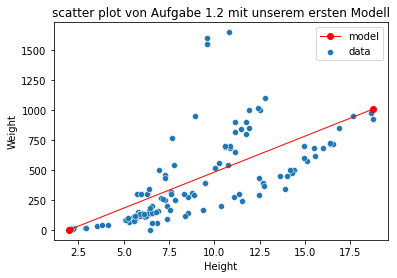

In [46]:
# 1.
b = lr.intercept_
# 2.
m = lr.coef_[0]

print("learned Intercept", b)
print("learned Slope", m)

# 3.

# Auslesen der minimalen Höhe und maximalen Höhe aller Fische
x_min = X_data[['Height']].min()
x_max = X_data[['Height']].max()

# Berechnen der jeweilige Vorhersage unseres Modells (hier manuell)
y_min_hat = b + m * x_min
y_max_hat = b + m * x_max

# Alternative: Berechnen der jeweilige Vorhersage unseres Modells (hier mit dem Modell)
del y_min_hat; del y_max_hat
y_min_hat = lr.predict([x_min])
y_max_hat = lr.predict([x_max])

# Kopieren den scatter plot von Aufgabe 1.2
plt.title("scatter plot von Aufgabe 1.2 mit unserem ersten Modell")
sns.scatterplot(data=pd.concat([X_data[['Height']], y_data], axis=1), x='Height', y='Weight')
# Zeichnen einer Linie der Vorhersagen mittels plt.plot
plt.plot([x_min, x_max], [y_min_hat, y_max_hat], marker='o', linewidth=1, c='red')

plt.legend(['model', 'data'])
plt.show()

4.
Die zugrundeliegenden Daten sind klar nicht linear, wir verwenden aber ein lineraes Modell.
Das Modell `underfittet` noch.

### Schlusswort Aufgabe 2

Glückwunsch Sie haben Ihr erstes Machine Learning Modell trainiert. Gehen Sie die Schritte noch einmal in Ruhe durch, wenn Ihnen nicht ganz klar ist, warum wir einzelne Schritte gemacht haben.

In Aufgabe 3 werden wir das Modell verbessern, indem wir **weitere Features** hinzufügen.

## Aufgabe 3 - Feature Engineering und Feature Selection

In Aufgabe 2 haben wir schrittweise ein erstes Modell erstellt, um das Gewicht (`Weight`) eines Fisches vorherzusagen.
Nun geht es darum weitere Features zu betrachten, dabei stellen sich folgende Fragen:

* Welche Features brauchen ein Preprocessing - genannt `Feature Preprocessing`
* Welche Features können wir zusätzlich "erstellen" - genannt `Feature Engineering`
* Welche Features sollen wir überhaupt in Betracht ziehen? - genannt `Feature Selection`

### Aufgabe 3.1 - Feature Preprocessing - `OneHotEncoder`

Wenn wir ein **nicht numerische** Features, wie beispielsweise der Name der Fischspezie (`Species`) haben, können wir das Feature nicht einfach in ein Lineares Regressions Modell geben, da das Modell eine Zahl erwartet.

Bei der Linearen Regression ist das Resultat schliesslich eine gewichtete Summe der Inputs, wie will man einen Text gewichten und dann aufsummieren?
Wenn $x^{(i)}_1$ beispielsweise `Roach` wäre, ist nicht klar was das Modell machen müsste:

\begin{equation*}
y^{(i)} = \beta_0 + \beta_{1}x^{(i)}_1 + \beta_{2}x^{(i)}_2 + \cdots + \beta_{p}x^{(i)}_p + \varepsilon^{(i)}
\end{equation*}

Für diesen Fall, haben wir im Theorieblock bereits vom `One-Hot-Encoding` gehört.
Hier fügen wir einfach für jede Spezienart ein weitere Feature hinzu, wie beispielsweise `Roach`. Hat ein Fisch die Spezie `Roach` ist der Wert `1`, ansonsten den Wert `0`.

<figure class="image">
  <img src="./img/one-hot-encoding.png" alt="One-Hot-Encoding example">
  <figcaption>One-Hot Encoding visuell dargestellt. Der Name One-Hot kommt daher, dass zeilenweise immer nur eine Spalte '1' ist.</figcaption>
</figure>

1. 
Nutzen Sie den `OneHotEncoder` von `sklearn.preprocessing`. Zuerst müssen Sie den `OneHotEncoder` auf den `Species` "trainieren" mittels `fit`. Anschliessend können wir die `Species` dann transformieren (das `One-Hot-Encoding` durchführen) mittels `transform`.
2. 
Analysieren Sie den Typ `type` und die Shape `shape` vom Resultat von Schritt 1.
3. 
Das Resultat von Schritt 1 müssen wir zuerst in ein `pd.DataFrame` packen mit gleichem index wie unsere Daten `X_train` und den entsprechenden Spaltennamen. Dies kann mittels `pd.DataFrame(..., index=X_train.index, columns=ohe.categories[0])` gemacht werden.
4.
Das DataFrame von Schritt 2 können wir dann mit `pd.concat([X_train.drop(columns='Species'), X_train_species], axis=1)` zu unseren Daten anfügen.
Nennen Sie das Resultat `X_train_ohe`.


#### Hilfreiche Links
* Encoding categorical features*: https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

In [47]:
# 1.

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')

# In .fit merkt sich der ohe welche Spezien es gibt.
ohe.fit(X_train[['Species']])
# In .transform wird das One-Hot-Encoding gemacht.
X_train_ohe_species = ohe.transform(X_train[['Species']])

# Alternative: Wir könnten fit und transform auch beide zusammen mittels fit_transform durchführen.
del X_train_ohe_species
X_train_ohe_species = ohe.fit_transform(X_train[['Species']])

In [48]:
# 2.
print(type(X_train_ohe_species))
print(X_train_ohe_species.shape)

# 3. Verwandle die Matrix zu einem DataFrame
X_train_species = pd.DataFrame(data=X_train_ohe_species.toarray(), index=X_train.index, columns=ohe.categories_[0])

# 4. Verbinde One Hot Encoded Features mit den anderen Features.
X_train_ohe = pd.concat([X_train.drop(columns='Species'), X_train_species], axis=1)

# Wir haben die Spalte / Feature 'Species' nicht mehr, dafür für jedemögliche Spezie eine Spalte / Feature
display(X_train_ohe.head())

<class 'scipy.sparse.csr.csr_matrix'>
(89, 7)


,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
46,21.0,22.5,25.0,6.5500,3.3250,0.0,0.0,0.0,0.0,1.0,0.0,0.0
140,48.3,51.7,55.1,8.9262,6.1712,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25,31.8,35.0,40.9,16.3600,6.0532,1.0,0.0,0.0,0.0,0.0,0.0,0.0
97,22.0,24.0,25.5,6.3750,3.8250,0.0,0.0,1.0,0.0,0.0,0.0,0.0
136,40.1,43.0,45.8,7.7860,5.1296,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Aufgabe 3.2 - Alle Features

Das Resultat von Aufgabe 3.1 ist ein DataFrame mit allen Featuren.
In dieser Aufgabe trainieren (`fit`) wir blindlings eine `LinearRegression` auf allen Features.

1. Erstellen Sie ein Lineares Regressions Modell mittels `LinearRegression()` und trainineren Sie es auf dem `Train-Set` (`X_train_ohe`, `y_train`) mittels `lr.fit`.
2. Verwenden Sie das in 1. trainierte Modell und predicten Sie die Zielvariable auf dem `Validation-Set` mittels `lr.predict`. Die Vorhersagen nennen wir `y_val_hat`.
 * Hinweis: Wir müssen `X_val` analog zu `X_train` in  Aufgabe 3.1 noch `preprocessen`.

In [49]:
# 1.
lr = LinearRegression()
lr.fit(X_train_ohe, y_train)

# 2.
X_val_ohe_species = ohe.transform(X_val[['Species']])
X_val_species = pd.DataFrame(data=X_val_ohe_species.toarray(), index=X_val.index, columns=ohe.categories_[0])
X_val_ohe = pd.concat([X_val.drop(columns='Species'), X_val_species], axis=1)

display(X_val_ohe.head())

y_val_hat = lr.predict(X_val_ohe)

mean_squared_error(y_val, y_val_hat, squared=False)

,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
100,23.5,25.6,27.0,6.5610,4.2390,0.0,0.0,1.0,0.0,0.0,0.0,0.0
63,16.3,17.7,19.8,7.4052,2.6730,0.0,1.0,0.0,0.0,0.0,0.0,0.0
66,19.0,20.7,23.2,8.5376,3.2944,0.0,1.0,0.0,0.0,0.0,0.0,0.0
47,21.1,22.5,25.0,6.4000,3.8000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
93,20.7,22.7,24.2,5.9532,3.6300,0.0,0.0,1.0,0.0,0.0,0.0,0.0


84.17066842603413

Wir sehen eine deutliche Verbesserung vom `RMSE` auf dem `Validation Set` hier (alle Features) zu Aufgabe 2 (ein Feature).

### Aufgabe 3.3 - Cross-Validation - `sklearn.model_selection.cross_val_predict`

In Aufgabe 1 haben wir das `Data-Set` einmal in ein `Train-Set` und `Validation-Set` aufgeteil und in Aufgabe 2 ein Modell auf dem `Train-Set` trainiert (`fit`) und danach auf dem `Validation-Set` validiert (`predict`).

Die somit gemessene Performanz auf dem `Validation-Set` ist stark abhängig von diesem einen `Validation-Set`.
Und wiederholen wir die Schritte mit einer anderen zufälligen Aufteilung in `Train-Set` und `Validation-Set`, kann die gemessene Perfomanz schwanken.
(Sie können dies selbst testen, indem Sie die oberen Aufgaben mehrfach ausführen, der `RMSE` auf dem `Validation-Set` schwankt stark).

Wir können die Performanz stabiler schätzen mit der im Theorie Teil vorgestellten `K-Fold-Cross-Validation`.

Dazu teilen wir das `Data-Set` systematisch in `k` (also beispielsweise 5) verschiedene `Train-Set` und `Validation-Set` auf,
wobei ein `Validation-Set` immer $\frac{1}{5}$ aller Datenpunkte beinhaltet und jeder Datenpunkt **genau einmal** in einem diesen 5 `Validation-Set`s vorkommt.

![K-Fold-Cross-Validation](./img/k-fold-cross-validation.png)

Anschliessend wird immer ein neues Modell auf einem `Train-Set` trainiert und die Werte auf dem `Validation-Set` vorhergesagt und gespeichert.
Nachdem wir das für alle 5 `Train-Set`s und `Validation-Set`s dies gemacht haben, haben wir für **jeden Datenpunkt im `Data-Set` eine Vorhersage** gemacht und gespeichert.

1. Man kann das oben beschriebene Verfahren mit `for` Schleifen selbst implementieren, aber `sklearn` bietet bereits eine vorgefertigte Lösung.
Wenden Sie `sklearn.model_selection.cross_val_predict` auf die `LinearRegression` und dem `Data-Set` (`X_data`, `y_data`) an.
2. Was genau ist der `cv` Parameter? Experimentieren Sie.
3. (Extra) Es gibt weitere Funktionen wie `cross_val_score` (https://scikit-learn.org/stable/modules/classes.html#model-validation). Was machen diese?
4. (Extra) Implementieren Sie die Cross-Validation mit `for` Schleifen selbst

In [50]:
from sklearn.model_selection import cross_val_predict

# 1.
y_data_hat = cross_val_predict(LinearRegression(), X_data[['Height']], y_data, cv=5)
print(mean_squared_error(y_data, y_data_hat, squared=False))

258.7796486598786


2.
Der `cv` Parameter entspricht dem `k` in der Aufgabenbeschreibung.
Je höher der Wert, desto stabiler die Vorhersage, aber je grösser auch der Rechenaufwand (da wir `k` Modelle trainieren müssen).

**Extra** zu 2.: Hier in der Musterlösung simulieren wir `n_run` mal verschiedene Werte für `cv`. Uns interessiert wie stark die Streuung (`std`) ist.
Je höher `cv` ist, desto konstanter sollte unsere Vorhersage sein, also so kleiner sollte die Streuung (`std`) sein.

,mean,std
2,17751.074800,3973.582438
3,18447.725977,2578.550626
4,18690.626969,2982.153994
5,17610.589192,1309.939049
6,17470.951335,1541.011450
7,17374.865306,736.169145
8,17479.717675,940.840213
9,17668.293389,1168.400337


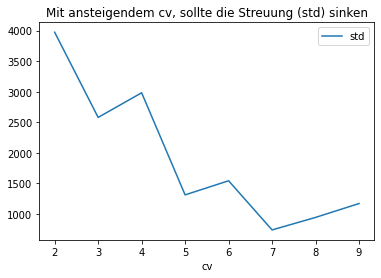

In [51]:
import numpy as np
import random
from sklearn.model_selection import cross_val_score
from collections import defaultdict
from sklearn.metrics import make_scorer

random.seed(42) # guarantee same outcome, when running again

n_runs = 25

y_data_shuffled_hats = defaultdict(list)

for cv in range(2, 10, 1):
    for i in range(n_runs):
        random_state = random.randint(0, 1_000_000)
        X_data_shuffled = X_data.sample(frac=1, random_state=random_state)
        y_data_shuffled = y_data.sample(frac=1, random_state=random_state)
        y_data_shuffled_hat = cross_val_score(LinearRegression(), X_data_shuffled.drop(columns='Species'), y_data_shuffled, cv=cv, scoring=make_scorer(mean_squared_error))
        y_data_shuffled_hats[cv].append(y_data_shuffled_hat.mean())

experiment_results = defaultdict(dict)
for cv, results in y_data_shuffled_hats.items():
    experiment_results['mean'][cv] = np.array(results).mean()
    experiment_results['std'][cv] = np.array(results).std()

display(pd.DataFrame(experiment_results))
plt.title('Mit ansteigendem cv, sollte die Streuung (std) sinken')
sns.lineplot(data=pd.DataFrame(experiment_results)[["std"]])
plt.xlabel('cv')
plt.show()

Die Cross-Validation ist ein mächtiges Werkzeug, da es Aussagen über unser Modell meistens stabiler macht.
Unsere Aussage ist nicht abhängig von einem einzigen zufälligen `Validation-Set`.

3.
und 4. nicht Teil der Musterlösung

### Aufgabe 3.4 - Feature Engineering

Es ist oft wichtig aus den bestehenden Features für das zugrundeliegende Problem sinnvolle Features zu "basteln" (`engineeren`).
Für das bestimmen vom Gewicht eines Fisches, ist beispielsweise das `Volumnen` wahrscheinlich relative wichtig.

1. Approximieren Sie das Volumen eines Fisches auf dem `Data-Set` mit den Featuren `Height`, `Width` und `Length3` (alle multiplizieren).
    * Nenne Sie das neue Feature `approx_Volume`
2. Vergleichen Sie alle Features ohne `approx_Volume` und alle Features mit `approx_Volume` mittels `cross_val_predict`.

In [52]:
# One-Hot Encoding auf dem Data-Set
X_data_ohe_species = ohe.transform(X_data[['Species']])
X_data_species = pd.DataFrame(data=X_data_ohe_species.toarray(), index=X_data.index, columns=ohe.categories_[0])
X_data_ohe = pd.concat([X_data.drop(columns='Species'), X_data_species], axis=1)

In [53]:
# 1.
X_data_ohe_engineered = X_data_ohe.copy()
X_data_ohe_engineered['approx_Volume'] = X_data_ohe_engineered['Height'] * X_data_ohe_engineered['Width'] * X_data_ohe_engineered['Length3']

# 2.

# Cross Validation mit allen Features ohne approx_Volume
y_data_hat = cross_val_predict(LinearRegression(), X_data_ohe, y_data, cv=5)
print(mean_squared_error(y_data, y_data_hat, squared=False))

# Cross Validation mit allen Features mit approx_Volume
y_data_hat = cross_val_predict(LinearRegression(), X_data_ohe_engineered, y_data, cv=5)
print(mean_squared_error(y_data, y_data_hat, squared=False))

106.36131207314718
69.08537918303284


### Aufgabe 3.5 (Extra) - Feature Selection

Im Fall vom Fisch Datensatz funktioniert es erstaunlich gut, einfach blindlings alle Features zu nehmen.
Dies liegt daran, dass wir für die Anzahl Features okay viele Datenpunkte haben. Wir haben 89 Datenpunkte im `Train-Set` für 6 Features (12 Features nach dem One-Hot-Encoding). Daher kommt es zu keinem `Overfitting`.

In [54]:
X_train.shape

(89, 6)

Als Faust-Regel sollte man **10 Datenpunkte pro Feature** haben (TODO REF).

Wir können trotzdem versuchen die Anzahl Features zu reduzieren. Dies kann auch trotz Performanzverlust vom Modell sinnvoll sein.
Beispielsweise müsste ein hypothetischer Benutzer weniger Daten in einem Formular eingeben, wenn man das Modell über ein Benutzerinterface zugängig macht.

In dieser Aufgabe versuchen wir die `4` wichtigsten Features mittels `sklearn.feature_selection.RFE` zu bestimmen.

1. Versuechen Sie manuell `4` Features auszuwählen und evaluieren Sie ein Modell mittels `cross_val_predict`.
2. Erstellen Sie ein `sklearn.feature_selection.RFE` mit einer `LinearRegression()` und `n_features_to_select=4` als Parameter. `fit`en Sie `RFE` mit dem `Data-Set` (`X_data_ohe_engineered`, `y_data`).
    * Bemerkung: `RFE` erwartet skalierte Features, skalieren Sie daher die Features zuerst mittels `sklearn.preprocessing.StandardScaler`.
3. Evaluieren Sie die Performanz gefundenen Features `rfe.get_support()` mittels `Cross Validation`.
4. Das Ergebniss aus Schritt 3. ist ein biased estimate der echten Performanz, warum?
5. Wiederholen Sie Schritt 3 mit `sklearn.feature_selection.SelectKBest`.
6. Wiederholen Sie Schritt 3 mit `sklearn.feature_selection.SelectFromModel`.

In [55]:
# Cross Validation mit allen Features
y_data_hat = cross_val_predict(LinearRegression(), X_data_ohe_engineered, y_data, cv=5)
print("All Features:", mean_squared_error(y_data, y_data_hat, squared=False))

# 1. Manuelle Feature Selection
y_data_hat = cross_val_predict(LinearRegression(), X_data_ohe_engineered[['approx_Volume', 'Width', 'Height', 'Length1']], y_data, cv=5)
print(f"Manuell 4 Feature Selection:", mean_squared_error(y_data, y_data_hat, squared=False))

All Features: 69.08537918303284
Manuell 4 Feature Selection: 80.99219606053809


In [56]:
from sklearn.feature_selection import SelectKBest, SelectFromModel, RFE
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_predict

k = 4

In [57]:
from sklearn.preprocessing import StandardScaler

# 2.
rfe = RFE(LinearRegression(), n_features_to_select=k)
# Bemerkung: RFE erwartet skalierte Features (andernfalls stimmen die Feature Wichtigkeiten nicht).
rfe.fit(StandardScaler().fit_transform(X_data_ohe_engineered), y_data)

# 3.
y_data_hat = cross_val_predict(LinearRegression(), X_data_ohe_engineered[X_data_ohe_engineered.columns[rfe.get_support()]], y_data, cv=5)
print("RFE")
print("Selektierte Features: ", list(X_data_ohe_engineered.columns[rfe.get_support()]))
print(f"Automatic {k} Feature Selection:", mean_squared_error(y_data, y_data_hat, squared=False))

RFE
Selektierte Features:  ['Length3', 'Height', 'Pike', 'approx_Volume']
Automatic 4 Feature Selection: 76.3266979443822


4.
Wir selektieren die Features anhand des `Data-Set`. Anschliessend führen wir `Cross Validation` auf den Features aus. Die Datenpunkte, die wir für die `Feature Selection` verwendeten, sind die gleichen, die wir in der `Cross Validation` verwenden. Der Messwert der `Cross Validation` ist hier also nicht unbiased.

In [58]:
# 5.
k_best = SelectKBest(mutual_info_regression, k=k)
k_best.fit(StandardScaler().fit_transform(X_data_ohe_engineered), y_data)

# Cross Validation mit k besten Features.
y_data_hat = cross_val_predict(LinearRegression(), X_data_ohe_engineered[X_data_ohe_engineered.columns[k_best.get_support()]], y_data, cv=5)
print("SelectKBest")
print("Selektierte Features: ", list(X_data_ohe_engineered.columns[k_best.get_support()]))
print(f"Automatic {k} Feature Selection:", mean_squared_error(y_data, y_data_hat, squared=False))

SelectKBest
Selektierte Features:  ['Length1', 'Length2', 'Length3', 'approx_Volume']
Automatic 4 Feature Selection: 85.63562457289504


In [59]:
# 6.
from_model = SelectFromModel(LinearRegression(), max_features=k)
from_model.fit(StandardScaler().fit_transform(X_data_ohe_engineered), y_data)

# Cross Validation mit k besten Features.
y_data_hat = cross_val_predict(LinearRegression(), X_data_ohe_engineered[X_data_ohe_engineered.columns[from_model.get_support()]], y_data, cv=5)
print("SelectFromModel")
print("Selektierte Features: ", list(X_data_ohe_engineered.columns[from_model.get_support()]))
print(f"Automatic {k} Feature Selection:", mean_squared_error(y_data, y_data_hat, squared=False))

SelectFromModel
Selektierte Features:  ['Length3', 'Height', 'Pike', 'approx_Volume']
Automatic 4 Feature Selection: 76.3266979443822


##### Weitere Schritte**
* Feature selection: https://scikit-learn.org/stable/modules/feature_selection.html

### Schlusswort Aufgabe 3

Wir haben angefangen das Problem mit Linearen Modellen zu lösen. In der Praxis würde man noch deutlich mehr probieren, beispeislweise:

* Systematisches `Feature Engineering` mit `PolynomialFeatures`: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
* Abgeschwächte `Feature Selection` mittels `Regularisierung` auf diesen erstellten Features, wie `Lasso` oder `Ridge`.
* Intelligentes `Feature Engineering` indem man Wissen von Fachpersonen (hier z.B. Fischverkäufer) in neue Features einfliessen lässt.

Für eine erste Übung haben wir aber schon viel getan. In der nächsten Übung bestimmen wir die Performanz unseres finalen Projektes mittels dem Test-Set.
In der Praxis würden wir dies am Ende des Projektes tun, damit wir ein unbiased Estimate über die Performanz unseres Modells haben.
Dieses Estimate ist vielleicht für die Kommunikation mit den Vorgesetzten, möglichen Kunden entscheidend.

## Aufgabe 4 - Test Set

In Aufgabe 1.2 haben wir das `Test-Set` (`X_test`, `y_test`) erstellt und beiseite gelegt. Nun wollen wir das gefundene Modell auf diesem `Test-Set` evaluieren.

1. Nehmen Sie ein Modell aus einer vorherigen Aufgabe als finales Modell.
2. Wenden Sie dieses Modell auf dem `Test-Set` (`X_test`, `y_test`) an. `X_test` muss allenfalls noch entsprechend verarbeitet werden (`One Hot Encoding`, etc.)
3. Bestimmen Sie den `RMSE` auf den Vorhersagen von Schritt 2 und `y_test`.

In [60]:
# 1. 
# Hier nehme ich das Modell aus Aufgabe 3.4
# Wir fitten hier auf allen Daten aus Train-Set und Validation-Set. Für das finale Modell kann dies gemacht werden.
final_model = LinearRegression().fit(X_data_ohe_engineered, y_data)

In [61]:
# 2.
X_test_ohe_species = ohe.transform(X_test[['Species']])
X_test_species = pd.DataFrame(data=X_test_ohe_species.toarray(), index=X_test.index, columns=ohe.categories_[0])
X_test_ohe = pd.concat([X_test.drop(columns='Species'), X_test_species], axis=1)

X_test_ohe_engineered = X_test_ohe.copy()

X_test_ohe_engineered['approx_Volume'] = X_test_ohe_engineered['Height'] * X_test_ohe_engineered['Width'] * X_test_ohe_engineered['Length3']

y_test_hat = final_model.predict(X_test_ohe_engineered)

print(mean_squared_error(y_test, y_test_hat, squared=False))

55.30982710307874


## Schlusswort Aufgabenblatt 2

Wir haben Konzepte kennen gelernt, die wir immer wieder antreffen werden, wie das Aufteilen in `Train-Set`, `Validation-Set` und `Test-Set`, wie auch das trainieren (`fit`) eines sklearn Modelles (`LinearRegression`).

### Pipeline (Extra)

Vielleicht ist Ihnen aufgefallen, dass wir oft die gleiche Schritte, wie OneHotEncoding, auf allen drei Datensätze anwenden mussten.
Um das handlicher zu machen, gibt es im sklearn das Konzept der `Pipeline`.

Für interessierte kann ich empfehlen sich darin einzulesen: https://scikit-learn.org/stable/modules/compose.html
Man kann diese Aufgaben auch mit Pipelines lösen.

sklearn Pipelines werden wir ansonsten am 3. Tag und im Machine Learning Lab wieder antreffen.